In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

There are 284807 rows and 31 columns in this dataset

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This dataset has no missing or null value column 

<Axes: >

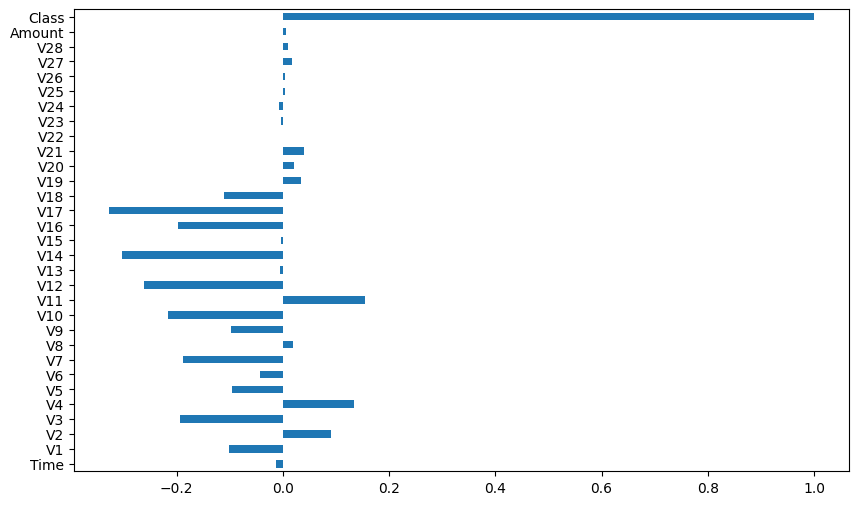

In [5]:
plt.figure(figsize = (10,6))
data.corr()['Class'].plot(kind = 'barh')

We see that there is no strong pearson correlation between columns to the target variable as they all fall between the range of -0.3 to 0.2 indicating a weak correlation 

Class
0    284315
1       492
Name: count, dtype: int64


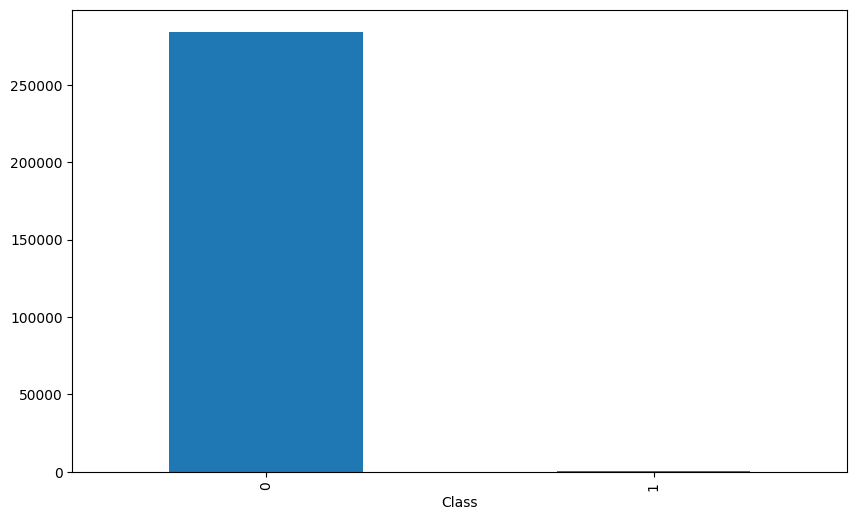

In [6]:
plt.figure(figsize = (10,6))
data['Class'].value_counts().plot(kind = 'bar')
print(data['Class'].value_counts())

Of the 284807 rows in this fraud dataset, only 492 are fraud cases which is common as most transactions in the banking sector are genuine

This will be taken into account later to find the optimal threshold

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
from sklearn.model_selection import train_test_split 

X = data.drop('Class', axis = 1)
y = data['Class']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, stratify = y, test_size = 0.2, shuffle = True)

In [9]:
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier as RFC, HistGradientBoostingClassifier as HGBC
from sklearn.metrics import precision_score, recall_score , f1_score
import time

In [12]:
model_name =  [ 'LIGHTGBM' , 'CATBOOST', 'RANDOMFOREST', 'HISTGRADIENTBOOSTING']
models =  [ LGBMClassifier(n_estimators = 3000, max_depth = 10, learning_rate = 0.01, random_state = 42,
                           class_weight = 'balanced', num_leaves = 100, reg_alpha = 1.0, reg_lambda = 1.0), 
            CatBoostClassifier( iterations = 1000, max_depth = 10, verbose = 0, eval_metric = 'F1', learning_rate = 0.01),
            RFC( n_estimators = 500, random_state = 42, criterion = 'log_loss', n_jobs = -1, class_weight = 'balanced'),
            HGBC(random_state = 42, max_depth = 10, max_iter = 1000, loss = 'log_loss', learning_rate = 0.01, 
                 min_samples_leaf = 100, class_weight = 'balanced', scoring = 'f1')
            ]
thresholds = [ 0.5, 0.4, 0.45, 0.3, 0.35, 0.2, 0.17]

In [13]:
for name, model in zip(model_name,models):
    print('##########################################################')
    print(f"""######### Model {name} Training in Progress ######### """)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print (f" Time Taken to Train Model {end_time - start_time} seconds")
    y_proba_train = model.predict_proba(X_train)[ : ,1]
    y_proba_test = model.predict_proba(X_test)[ : ,1]
    for threshold in thresholds:
        print(f" ############### Threshold Evaluation In Progress: {threshold} ##############")
        y_pred_train = (y_proba_train > threshold).astype(int)
        y_pred_test = (y_proba_test > threshold).astype(int)
        precision_score_train = precision_score(y_train, y_pred_train)
        precision_score_test = precision_score(y_test, y_pred_test)
        recall_score_train = recall_score( y_train, y_pred_train)
        recall_score_test = recall_score( y_test, y_pred_test)
        fl_score_train = f1_score( y_train, y_pred_train)
        fl_score_test = f1_score( y_test, y_pred_test)
        print (f"Stats of Training Dataset | Precision Score: {precision_score_train} | Recall Score: {recall_score_train} | F1 Score: {fl_score_train}")
        print (f"Stats of Testing Dataset | Precision Score: {precision_score_test} | Recall Score: {recall_score_test} | F1 Score: {fl_score_test}")       

##########################################################
######### Model LIGHTGBM Training in Progress ######### 
 Time Taken to Train Model 348.23027324676514 seconds
 ############### Threshold Evaluation In Progress: 0.5 ##############
Stats of Training Dataset | Precision Score: 0.9899497487437185 | Recall Score: 1.0 | F1 Score: 0.9949494949494949
Stats of Testing Dataset | Precision Score: 0.875 | Recall Score: 0.8571428571428571 | F1 Score: 0.865979381443299
 ############### Threshold Evaluation In Progress: 0.4 ##############
Stats of Training Dataset | Precision Score: 0.9874686716791979 | Recall Score: 1.0 | F1 Score: 0.9936948297604036
Stats of Testing Dataset | Precision Score: 0.865979381443299 | Recall Score: 0.8571428571428571 | F1 Score: 0.8615384615384616
 ############### Threshold Evaluation In Progress: 0.45 ##############
Stats of Training Dataset | Precision Score: 0.9899497487437185 | Recall Score: 1.0 | F1 Score: 0.9949494949494949
Stats of Testing Dataset | Prec

Results from the trained model reveals that the overall best model was the Random Forest with Catboost closely folllowing. 
Optimal Threshold that overall handles F1 (balance between precision and recall) was the 0.3, although the 0.2 threshold has a 
better recall, the trade off between precision is significantly higher than the 0.3 threshold.

Hyperparameter Tuning the Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', {0:1, 1:5}, {0:1, 1:10}],
    'bootstrap': [True, False]
}

rf = RFC(random_state=42)

tuner = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=50,  
    scoring='f1',
    cv=3,
    verbose=0,
    n_jobs=-1
)

tuner.fit(X_train, y_train)

print("Best Params:", tuner.best_params_)
print("Best F1 Score:", tuner.best_score_)
